In [2]:
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load data
S = np.load('/media/carsen/DATA1/BootCamp/mesoscope_cortex/spks.npy')
iscell = np.load('/media/carsen/DATA1/BootCamp/mesoscope_cortex/iscell.npy')
S = S[iscell[:,0].astype(bool),:]


In [4]:
# rastermap algorithm
import sys
sys.path.insert(0, '/media/carsen/DATA2/github/rastermap/rastermap/')
import rastermap

# run sorting
isort1,isort2 = rastermap.main(S)
# isort1 is neuron sorting, isort2 is time sorting


In [19]:
# sort neurons and smooth across neurons and zscore in time
Sm = gaussian_filter1d(S[isort1,:].T, np.minimum(10,int(S.shape[0]*0.005)), axis=1)
Sm = Sm.T
Sm = zscore(Sm, axis=1)

# (optional) smooth in time
Sm = gaussian_filter1d(Sm, 1, axis=1)

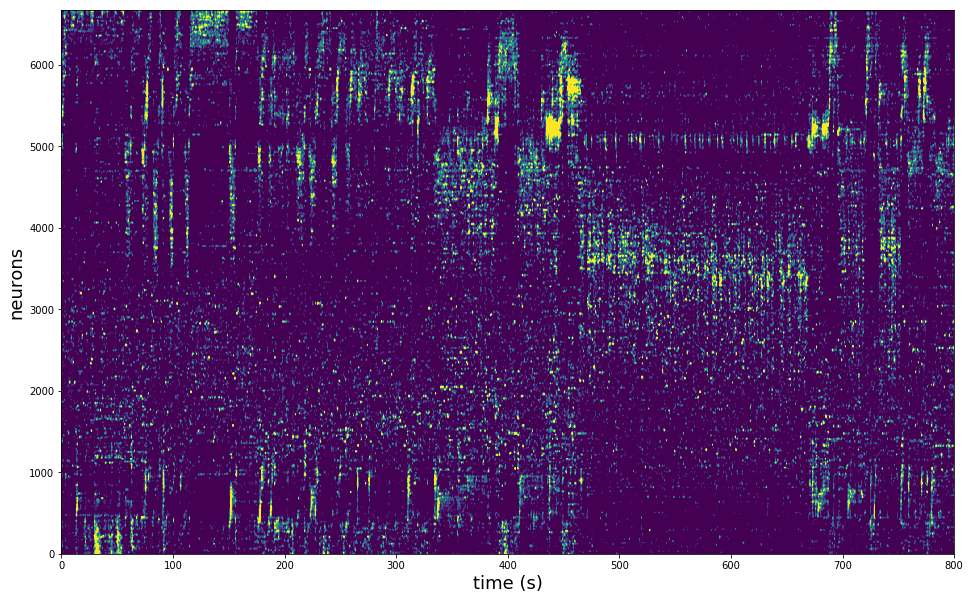

In [26]:
# view neuron sorting
fs = 2.5 # sampling rate of data in Hz
sp = Sm[:,1000:3000]
plt.figure(figsize=(16,10))
ax=plt.imshow(sp,vmin=0,vmax=3,aspect='auto',extent=[0,sp.shape[1]/fs, 0,sp.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()
